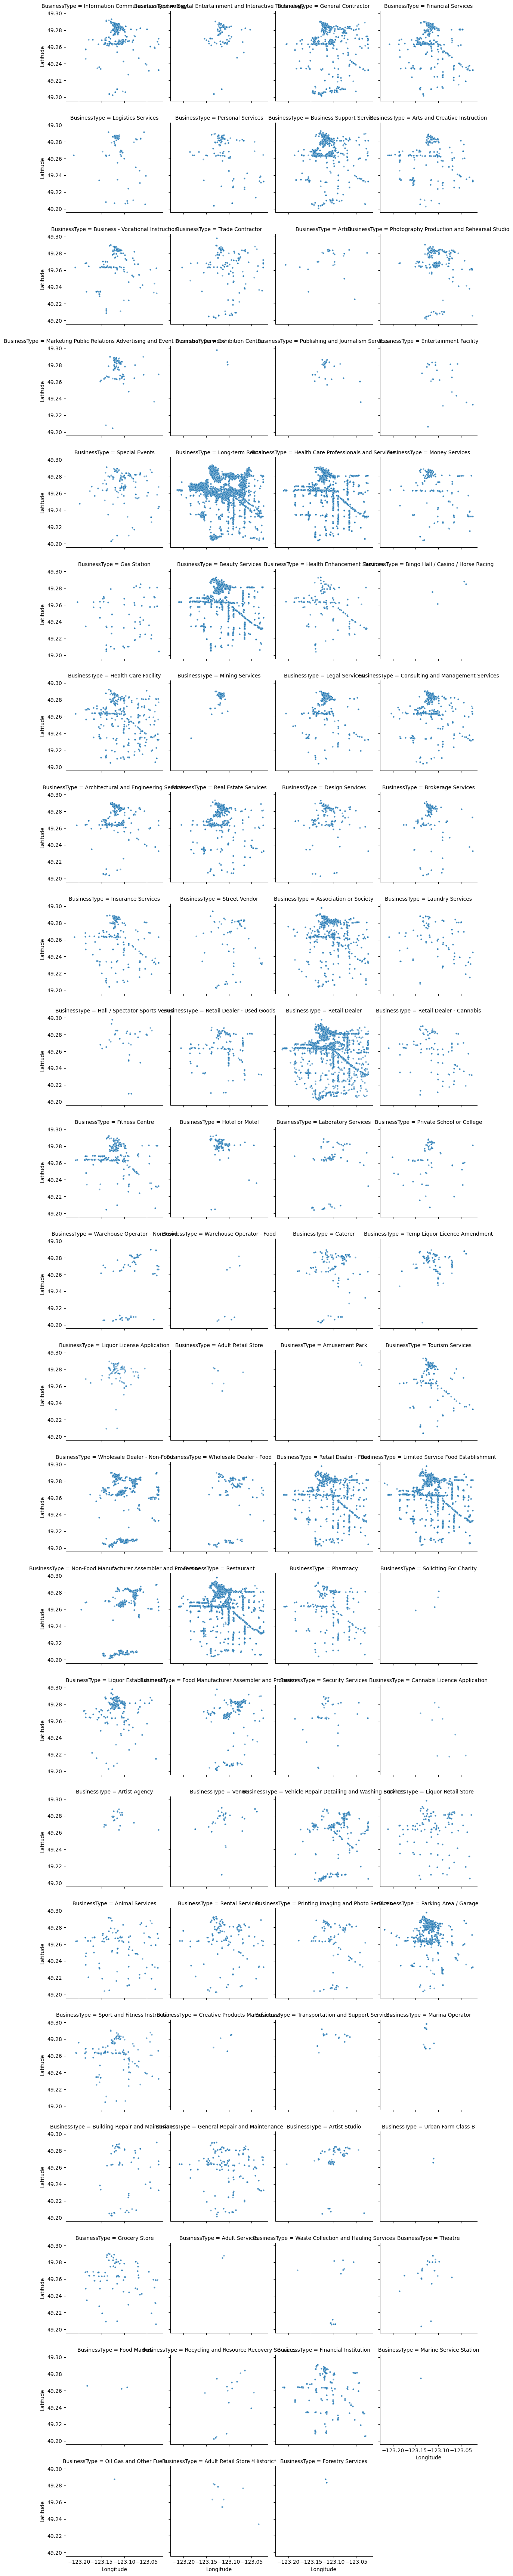

Saved faceted_business_locations.png


In [6]:

import pandas as pd


from pandas._libs.tslibs.offsets import BusinessMixin

import matplotlib.pyplot as plt




# Let's read this csv data file into a dataframe:

df = pd.read_csv("Businesses-Analysis/business-licences.csv", sep=";", low_memory = False)

# Let's look at some general info about the dataframe:

#print(df.shape)

# (131740 observations, 25 variables)

# Let's look at the columns:

#print(df.columns)

'''

'FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
 'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
 'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
 'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
 'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
 'geo_point_2d'],
dtype='object'

'''

# We can start thinking about which ones we want to use later. 

# For now, let's make sure that we view all columns when we print the dataframe:

pd.set_option('display.max_columns', None)

# We can look at some example data:


#print(df.head(30))

#print(df.sample(10))

# This helps us understand the data better, like for example, there are specific coordinates for many business licenses, but not all.

# Let's now look at the data types of each variable:

#print(df.info())



'''
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FOLDERYEAR             131740 non-null  int64  
 1   LicenceRSN             131740 non-null  int64  
 2   LicenceNumber          131740 non-null  object 
 3   LicenceRevisionNumber  131740 non-null  int64  
 4   BusinessName           123071 non-null  object 
 5   BusinessTradeName      49803 non-null   object 
 6   Status                 131740 non-null  object 
 7   IssuedDate             114921 non-null  object 
 8   ExpiredDate            114939 non-null  object 
 9   BusinessType           131740 non-null  object 
 10  BusinessSubType        13744 non-null   object 
 11  Unit                   31581 non-null   object 
 12  UnitType               31412 non-null   object 
 13  House                  71613 non-null   object 
 14  Street                 71625 non-null   object 
 15  City                   131705 non-null  object 
 16  Province               131692 non-null  object 
 17  Country                106226 non-null  object 
 18  PostalCode             71112 non-null   object 
 19  LocalArea              129023 non-null  object 
 20  NumberofEmployees      131740 non-null  float64
 21  FeePaid                67350 non-null   float64
 22  ExtractDate            131740 non-null  object 
 23  Geom                   66488 non-null   object 
 24  geo_point_2d           66488 non-null   object 

'''

# Hmm, I want to know more about geom and geo_point_2d. let's generate a sample of what it looks like:

#print(df['Geom'].sample(10))

# one of the samples: {"coordinates": [-123.121381503733, 49.2635970...

# That looks hard to manipulate. Maybe we can use geo_point_2d instead.

#print(df['geo_point_2d'].sample(10)) 

# 49.2875182283394, -123.11723844762
# Much better! We can maybe use this to plot coordinates later.



# Let's look at the number of null values for each variable:

#print(df.isnull().sum())

'''
Number of null values for each variable:

FOLDERYEAR                    0
LicenceRSN                    0
LicenceNumber                 0
LicenceRevisionNumber         0
BusinessName               8669
BusinessTradeName         81937
Status                        0
IssuedDate                16819
ExpiredDate               16801
BusinessType                  0
BusinessSubType          117996
Unit                     100159
UnitType                 100328
House                     60127
Street                    60115
City                         35
Province                     48
Country                   25514
PostalCode                60628
LocalArea                  2717
NumberofEmployees             0
FeePaid                   64390
ExtractDate                   0
Geom                      65252
geo_point_2d              65252



'''
# It looks like geographical data is missing for 65252 observations. That'll be important when cleaning this data.

# Let's look at the unique values for business type:

#print(df['BusinessType'].value_counts())

# There are a lot!

# Let's now see the different values for status, and the

#print(df['Status'].value_counts())

'''

Status
Issued                  109119
Pending                  11005
Gone Out of Business      4811
Inactive                  4112
Cancelled                 2693


'''

# I'm curious on the variety of employee numbers too:

#print(df['NumberofEmployees'].value_counts())

'''

NumberofEmployees
0.0      47789
1.0      28541
2.0      11497
3.0       6459
4.0       5114
         ...  
221.0        1
278.0        1
447.0        1
963.0        1
830.0        1


'''

# Intersting, some businesses have 0 and 1 employees, maybe indicating they are the whole business.

#print(df['NumberofEmployees'].max())

# Max # of employees is 5876. 

# Just for fun we can see the different counts for different local areas, to check variety.

#print(df['LocalArea'].value_counts())


'''
LocalArea
Downtown                    31389
Fairview                    10430
Kitsilano                    8511
Mount Pleasant               8259
Out of Town                  7823
West End                     6945
Kensington-Cedar Cottage     6735
Grandview-Woodland           5605
Renfrew-Collingwood          5415
Sunset                       4790
Marpole                      4475
Hastings-Sunrise             4295
Riley Park                   4177
Strathcona                   4157
Victoria-Fraserview          2677
Killarney                    2326
Dunbar-Southlands            2245
Arbutus-Ridge                1758
Kerrisdale                   1717
West Point Grey              1659
South Cambie                 1380
Oakridge                     1318
Shaughnessy                   898
UBC                            27
Arbutus Ridge                  12

total 193136

''' 

# There is great variety in areas.

# Cleaning the data:

# Drop observations with a null geo_point_2d value:

df1 = df[df['geo_point_2d'].notnull()].copy()

#print(df1.info())

# (66488 observations kept)

# Check if there are any duplicate values:

#print(df.duplicated().sum())

# No duplicates, so we can move on


# Group by local area and business type, for later:

# df0 = df.groupby(['LocalArea', 'BusinessType']))


# We can now try creating a visual representation of the data, using geo_point_2d.
# We do have a slight problem though, if we want to graph based on two axises, we need to split the column into two.
# Let's do just that:

df1[['lat', 'long']] = df1['geo_point_2d'].str.split(',', expand = True)

#print(df1.sample(2))

# Okay great we now have separate columns for latitude and longitude. 
# They are still strings though, so we need to convert them to floats.

df1[['lat', 'long']] = df1[['lat', 'long']].astype(float)

#print(df1.sample(2))

#print(df1.info())

# Great. Now we can make a scatterplot with longitude and latitude, to see where business locations are distributed.



# Use seaborn for a nicer scatterplot by LocalArea (if available)
import seaborn as sns

'''
if 'LocalArea' not in df1.columns:
    df1['LocalArea'] = 'Unknown'

unique_local_areas = df1['LocalArea'].nunique()

plt.figure(figsize=(12, 9))
sns.scatterplot(
    data=df1,
    x='long',
    y='lat',
    hue='LocalArea',
    s=10,
    alpha=0.5,
        palette=sns.color_palette("tab20", n_colors=min(20, unique_local_areas)),
        legend=False
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Business locations by LocalArea')
plt.tight_layout()
plt.show()

'''

# It looks crowded, so let's use faceting to separate by BusinessType instead:


g = sns.relplot(
    data=df1,
    x='long',
    y='lat',
    col='BusinessType',
    col_wrap=4,            # panels per row
    height=3,              # height per facet (inches)
    aspect=1,              # width = height * aspect
    kind='scatter',
    s=10,
    alpha=0.6,
    facet_kws={'sharex': True, 'sharey': True}
)

g.set_axis_labels("Longitude", "Latitude")
plt.tight_layout()
plt.show()  # optional
print("Saved faceted_business_locations.png")